In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import fbprophet
import itertools
import statsmodels.api as sm
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

# Import Data

In [2]:
data = pd.read_excel("Product Sales.xlsx", header=0)

## Clean Data

In [92]:
data

,Year,Week,Date,Sales,Cost,Quantity
0,2014,1,2013-12-30,184545.83,192379.82,5626
1,2014,1,2013-12-31,247512.77,256684.77,7638
2,2014,1,2014-01-01,71516.87,73569.28,2207
3,2014,1,2014-01-02,164961.37,169637.99,5089
4,2014,1,2014-01-03,269401.18,279110.31,8310
5,2014,1,2014-01-04,253032.92,262258.70,7804
6,2014,1,2014-01-05,147668.40,153084.09,4552
7,2014,2,2014-01-06,252462.66,262086.22,7786
8,2014,2,2014-01-07,184613.77,191923.58,5695
9,2014,2,2014-01-08,83922.72,83097.69,2464


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1053 entries, 0 to 1052
Data columns (total 6 columns):
Year        1053 non-null int64
Week        1053 non-null int64
Date        1053 non-null datetime64[ns]
Sales       1053 non-null float64
Cost        1053 non-null float64
Quantity    1053 non-null int64
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 49.4 KB


In [6]:
data.describe()

,Year,Week,Sales,Cost,Quantity
count,1053.000000,1053.000000,1053.000000,1053.000000,1053.000000
mean,2014.962963,25.641026,146278.423352,154068.255442,4132.115859
std,0.808437,14.595832,105111.804326,116151.258794,3214.995103
min,2014.000000,1.000000,16889.890000,15364.200000,419.000000
25%,2014.000000,13.000000,66502.620000,65300.180000,1686.000000
50%,2015.000000,26.000000,116949.900000,120230.460000,3167.000000
75%,2016.000000,38.000000,194737.550000,209514.790000,5588.000000
max,2016.000000,52.000000,697742.180000,729186.260000,21764.000000


In [7]:
data.Year.value_counts()

2015    364
2014    364
2016    325
Name: Year, dtype: int64

In [8]:
data.corr()

,Year,Week,Sales,Cost,Quantity
Year,1.000000,-0.075564,-0.189171,-0.181910,-0.222721
Week,-0.075564,1.000000,-0.055176,-0.049401,-0.053848
Sales,-0.189171,-0.055176,1.000000,0.998192,0.993801
Cost,-0.181910,-0.049401,0.998192,1.000000,0.992716
Quantity,-0.222721,-0.053848,0.993801,0.992716,1.000000


In [9]:
data[['Year','Sales','Cost','Quantity']].groupby('Year').describe()

Cost                                                                  \
      count           mean            std       min         25%         50%   
Year                                                                          
2014  364.0  177906.233269  132146.763791  19662.81  80273.1625  138928.950   
2015  364.0  155759.660110  108439.178703  20154.50  66670.1450  125002.385   
2016  325.0  125475.347046   97997.575453  15364.20  50695.0700   94641.400   

                             Quantity                 ...              \
              75%        max    count         mean    ...         75%   
Year                                                  ...               
2014  238072.8175  729186.26    364.0  5098.554945    ...      6676.0   
2015  220174.2250  650120.94    364.0  3872.260989    ...      5469.5   
2016  182620.8100  500788.43    325.0  3340.741538    ...      4911.0   

               Sales                                                     \
          max  count           mean            std       min        25%   
Year                                                                      
2014  21764.0  364.0  170307.772940  121359.442683  22143.66  81620.730   
2015  15605.0  364.0  144678.258324   96728.206467  19147.14  65520.925   
2016  13413.0  325.0  121157.736646   87209.019788  16889.89  55506.870   

                                       
            50%        75%        max  
Year                                   
2014  135033.71  223476.51  697742.18  
2015  118426.64  201176.88  589253.40  
2016   93215.58  169532.07  458909.01  

[3 rows x 24 columns]

In [17]:
data[['Week','Sales','Cost','Quantity']].groupby('Week').describe()

Cost                                                                    \
     count           mean            std        min          25%         50%   
Week                                                                           
1     21.0  190078.344286   72277.226501   73569.28  146641.4800  189855.200   
2     21.0  121413.072381   63343.118848   57684.66   76599.6700  103174.220   
3     21.0   85439.903810   31274.889145   47820.31   63550.2700   72299.360   
4     21.0  102132.072857   64393.335388   47791.75   56817.8200   75220.700   
5     21.0  144192.678095  107956.293217   41614.16   59681.6200  114737.040   
6     21.0  162593.140000   91859.420959   38803.21   86653.8100  128890.510   
7     21.0  153268.912857   93547.944027   46398.78  108350.5300  124186.570   
8     21.0  143297.512857   78344.657441   44703.00   90083.2400  124332.640   
9     21.0  216678.410476  174480.917105   41031.12  108647.5400  175172.110   
10    21.0  211007.532381  112971.989776   62152.53  131757.9900  195314.990   
11    21.0  121736.191429  109664.590178   29233.98   51902.7300   79573.810   
12    21.0   76101.247619   48637.893013   27001.48   42065.5600   61662.950   
13    21.0  159084.243333  102014.486491   37783.40   68123.0600  134222.460   
14    21.0  208397.619048  155928.546241   57215.36  112480.7300  156979.700   
15    21.0  136881.178571   75419.997674   42476.15   94993.8000  109284.250   
16    21.0  172860.253333  130795.063218   33395.78   84792.5400  118751.600   
17    21.0  173740.951905  110504.268975   46131.91  102881.0300  149687.050   
18    21.0  236183.748095  125225.042655   76592.10  131526.0600  228480.760   
19    21.0  216309.333333   97243.652674   77892.86  124360.6900  212821.710   
20    21.0  165160.582857  125010.064363   19708.06   57759.7900  149855.140   
21    21.0  156155.521429  132048.874372   24987.62   68365.9100  146776.910   
22    21.0  263299.402381  127828.788333   50125.56  186701.9500  219279.810   
23    21.0  262625.615238   75671.515539  153612.97  182620.8100  251021.930   
24    21.0  160199.771429  100258.177619   50930.19   88770.1900  149124.180   
25    21.0  141811.165238   60970.282527   63274.22   99956.0800  120373.770   
26    21.0  144163.315238  112205.367641   28896.39   51982.9200  116396.360   
27    21.0  191453.670952  103576.919977   57068.74   95651.2800  188700.210   
28    21.0   97166.391905   58084.353457   28505.48   56328.8700   80845.560   
29    21.0   71938.030000   44575.407954   21784.74   43905.8800   65925.700   
30    21.0  108468.347619  129829.328117   25195.81   38018.5200   59669.380   
31    21.0  148124.830000  151696.928398   30843.17   47714.3800   75456.020   
32    21.0  116077.807143  109190.142757   21633.14   51423.3700   65239.580   
33    21.0  143029.277619  118623.285208   22222.28   60759.0500  108365.610   
34    21.0  136009.389048   95171.705306   20154.50   65797.8500  120182.590   
35    21.0  258337.484762  153423.527531   31480.33  184079.0500  240114.430   
36    21.0  309451.652381  120624.017993  118983.30  218307.6300  306329.630   
37    21.0   86015.374762   57722.477735   25722.89   45436.8400   64041.860   
38    21.0   53843.890000   29704.451862   15364.20   33135.9500   52296.820   
39    21.0  170213.191429  159581.840095   28454.96   37486.2100  113296.050   
40    21.0  257767.228571  170131.822932   44159.12  126288.3000  237392.280   
41    21.0  101755.044286   80378.805167   38134.24   51821.1500   67902.670   
42    21.0   60395.784762   30824.213846   16475.47   37612.9400   51900.120   
43    21.0   88396.561429   65015.852154   28160.06   43282.9700   79236.270   
44    21.0  118004.197619   82880.127481   30391.93   57102.9000  102155.960   
45    21.0  123349.016667   59259.387727   52105.31   74762.5400  114166.510   
46    21.0  116032.949048   81719.289538   40377.33   61847.6100   88613.330   
47    17.0  104131.380588   79348.219767   22486.69   41839.1200   70586.310   
48    

## Data Analysis

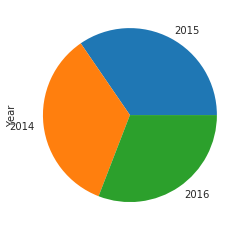

In [11]:
data['Year'].value_counts().plot.pie()

# Unsquish the pie.

plt.gca().set_aspect('equal')

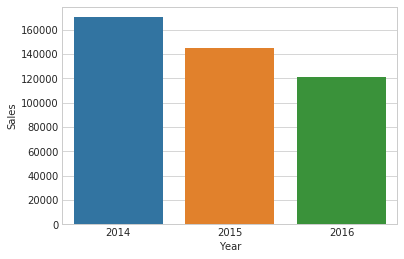

In [14]:
year_class = data[["Year", "Sales"]].groupby(['Year'],as_index=False).mean()
sns.barplot(x='Year', y='Sales', data=year_class)

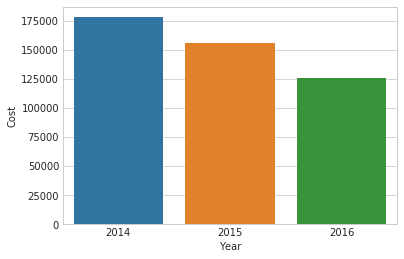

In [15]:
year_class1 = data[["Year", "Cost"]].groupby(['Year'],as_index=False).mean()
sns.barplot(x='Year', y='Cost', data=year_class1)

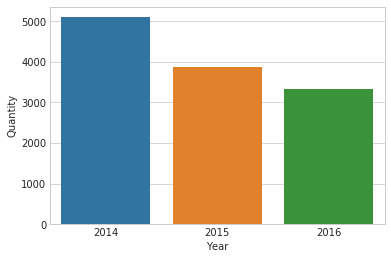

In [16]:
year_class2 = data[["Year", "Quantity"]].groupby(['Year'],as_index=False).mean()
sns.barplot(x='Year', y='Quantity', data=year_class2)

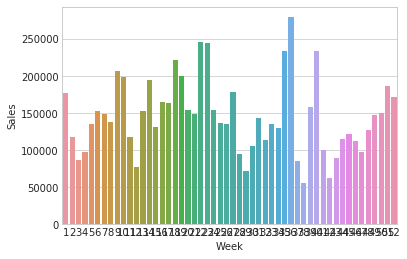

In [18]:
week_class = data[["Week", "Sales"]].groupby(['Week'],as_index=False).mean()
sns.barplot(x='Week', y='Sales', data=week_class)

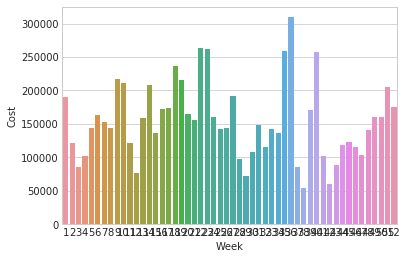

In [19]:
week_class1 = data[["Week", "Cost"]].groupby(['Week'],as_index=False).mean()
sns.barplot(x='Week', y='Cost', data=week_class1)

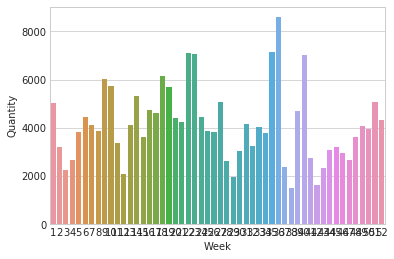

In [20]:
week_class2 = data[["Week", "Quantity"]].groupby(['Week'],as_index=False).mean()
sns.barplot(x='Week', y='Quantity', data=week_class2)

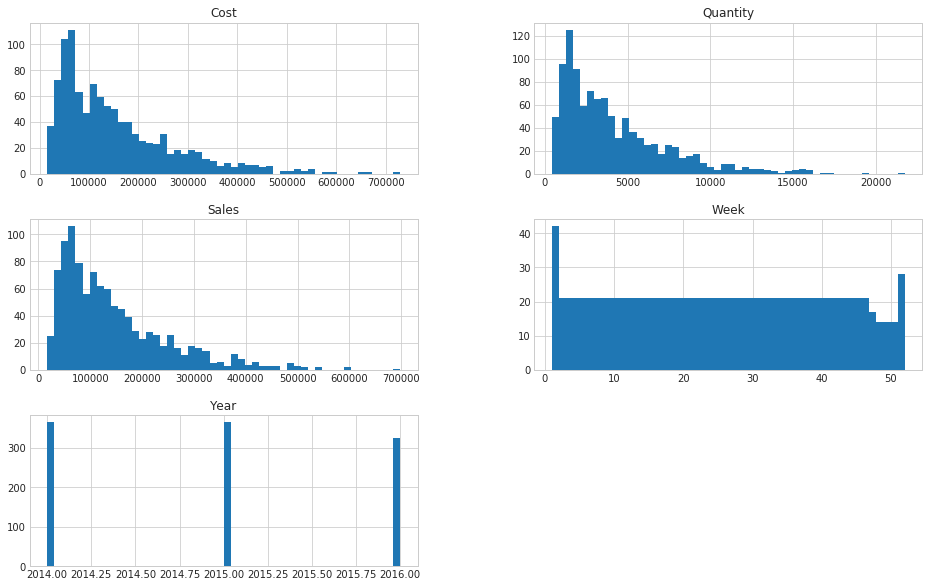

In [33]:
data.hist(figsize=(16,10), bins=50) 
plt.show()

## Create a forcast model

In [26]:
explore = pd.read_excel("Product Sales.xlsx", header=0,index_col="Date")

In [28]:
quantity = explore[['Quantity']]

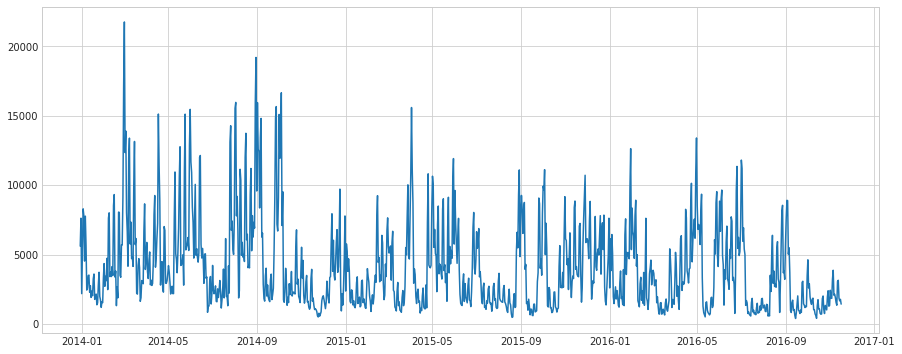

In [32]:
plt.plot(quantity)

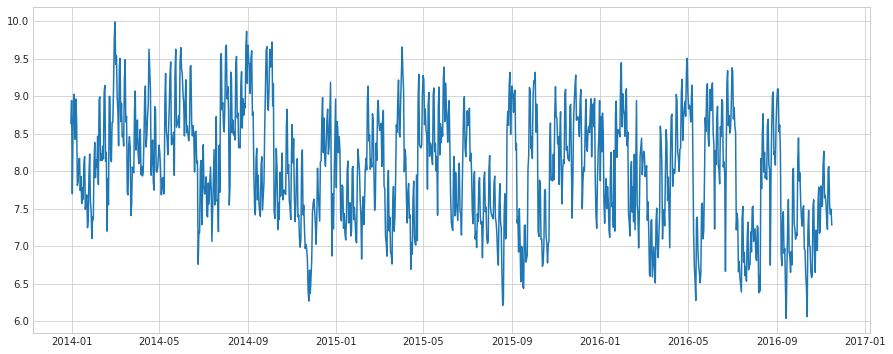

In [82]:
quantity_log = np.log(quantity)
plt.plot(quantity_log)

/home/carel/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=12,center=False).mean()
  """Entry point for launching an IPython kernel.


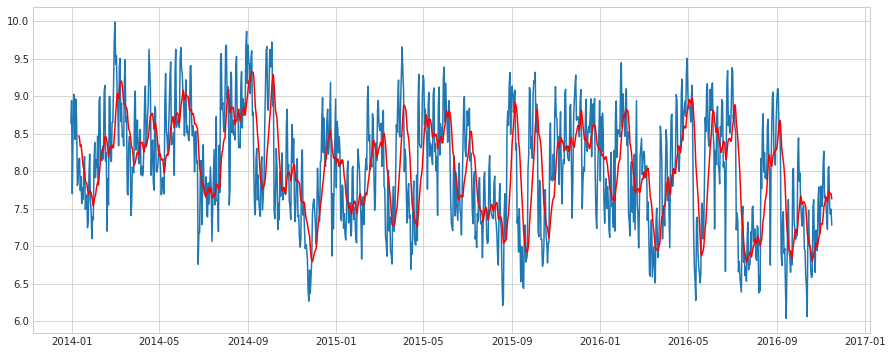

In [84]:
moving_avg = pd.rolling_mean(quantity_log,12)
plt.plot(quantity = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))_log)
plt.plot(moving_avg, color='red')

In [87]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [88]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(quantity,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:20486.0639633
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:19743.804296
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:20281.1790227
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:19912.4524604
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:19964.0276182
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:19665.6614474
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:20070.3734788
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:19655.2478461
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:19849.9253026
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:19039.0971658
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:19574.7517459
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:19854.3402252
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:19464.8915158
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:19039.6419609
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:19084.6981891
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:19132.0005377
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:19103.8394888
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:19080.7976777
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:19406.3470822
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 -

In [89]:
mod = sm.tsa.statespace.SARIMAX(quantity,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8464      0.070    -12.081      0.000      -0.984      -0.709
ma.L1          0.9001      0.060     15.022      0.000       0.783       1.017
ar.S.L12      -0.1559      0.028     -5.530      0.000      -0.211      -0.101
ma.S.L12      -0.9857      0.022    -44.366      0.000      -1.029      -0.942
sigma2      5.661e+06   1.91e+05     29.625      0.000    5.29e+06    6.04e+06


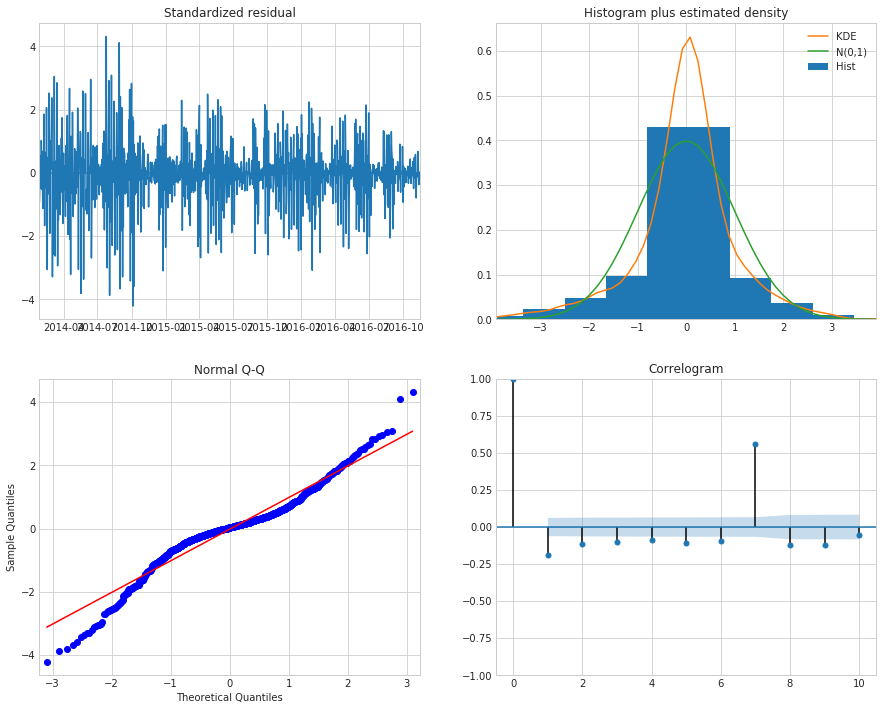

In [90]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [93]:
pred = results.get_prediction(start=pd.to_datetime('2016-10-18'), dynamic=False)
pred_ci = pred.conf_int()

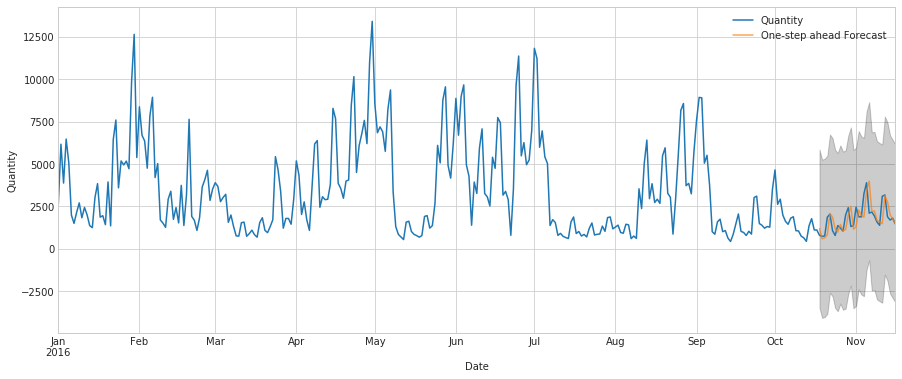

In [96]:
ax = quantity['2016':].plot(label= 'observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Quantity')
plt.legend()

plt.show()

In [109]:
# Get forecast 500 steps ahead in future
pred_uc = results.get_forecast(steps=93)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

In [120]:
pred_uc.predicted_mean

2016-11-17    1375.009642
2016-11-18    1874.552534
2016-11-19    1979.007561
2016-11-20    2012.553600
2016-11-21    1998.336073
2016-11-22    2055.171728
2016-11-23    1781.198279
2016-11-24    1699.052553
2016-11-25    1758.615120
2016-11-26    1787.029575
2016-11-27    1880.532723
2016-11-28    1796.087034
2016-11-29    1868.134325
2016-11-30    1977.759180
2016-12-01    2103.428039
2016-12-02    2073.100768
2016-12-03    2023.822737
2016-12-04    2025.342278
2016-12-05    2075.310964
2016-12-06    2006.516473
2016-12-07    1865.991283
2016-12-08    1851.413474
2016-12-09    1954.685840
2016-12-10    1823.818017
2016-12-11    1877.519954
2016-12-12    2043.660403
2016-12-13    2169.635633
2016-12-14    2146.207360
2016-12-15    2104.983432
2016-12-16    2112.935474
                 ...     
2017-01-19    2363.829436
2017-01-20    2321.865189
2017-01-21    2328.650159
2017-01-22    2336.809542
2017-01-23    2264.646332
2017-01-24    2152.418497
2017-01-25    2142.511445
2017-01-26  

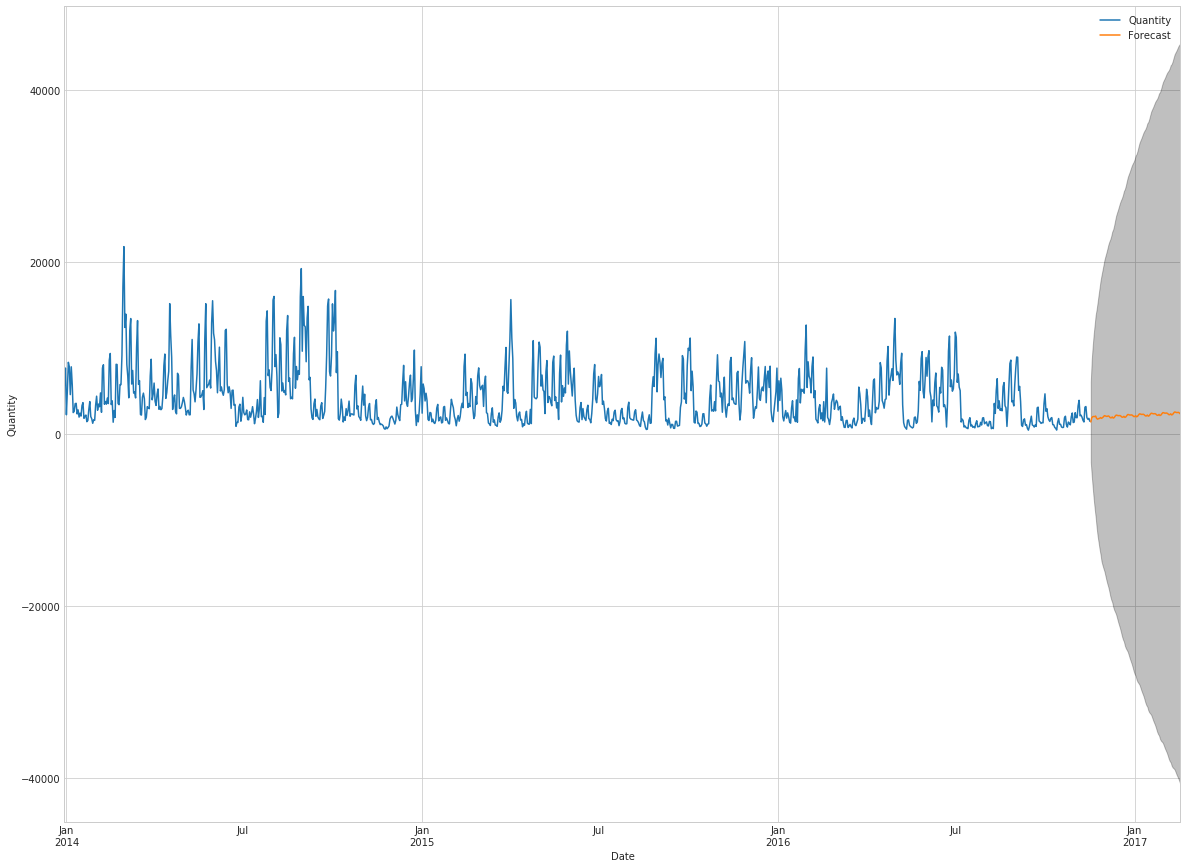

In [110]:
ax = quantity.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Quantity')

plt.legend()
plt.show()

## Using Prophet

In [39]:
pm = data[['Date','Quantity']]

In [46]:
pm.tail()

,ds,y
1048,2016-11-12,3167
1049,2016-11-13,1880
1050,2016-11-14,1686
1051,2016-11-15,1797
1052,2016-11-16,1453


In [69]:
# Prophet requires columns ds (Date) and y (value)
pm = pm.rename(columns={'Date': 'ds', 'Quantity': 'y'})
# Make the prophet model and fit on the data
pm_prophet = fbprophet.Prophet(changepoint_prior_scale=0.01,interval_width=0.95)
pm_prophet.fit(pm)

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [70]:
# Make a future dataframe for 3 Months
pm_forecast = pm_prophet.make_future_dataframe(periods=93, freq='D')

In [71]:
pm_forecast.tail()

,ds
1141,2017-02-13
1142,2017-02-14
1143,2017-02-15
1144,2017-02-16
1145,2017-02-17


In [72]:
# Make predictions
pm_forecast = pm_prophet.predict(pm_forecast)

In [73]:
pm_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2013-12-30,5046.437542,24.595706,10142.334545
1,2013-12-31,4373.125254,-542.595639,9348.282306
2,2014-01-01,4363.009985,-883.388450,9885.604384
3,2014-01-02,4023.946841,-1141.675457,9363.385954
4,2014-01-03,6280.401559,863.910200,11691.579372
5,2014-01-04,6896.245970,1473.207673,11698.214677
6,2014-01-05,3385.650547,-1664.387148,8652.117554
7,2014-01-06,3629.841974,-1837.780491,9094.464997
8,2014-01-07,3038.118047,-2345.079472,8414.191560
9,2014-01-08,3129.449995,-1447.730751,8508.901159


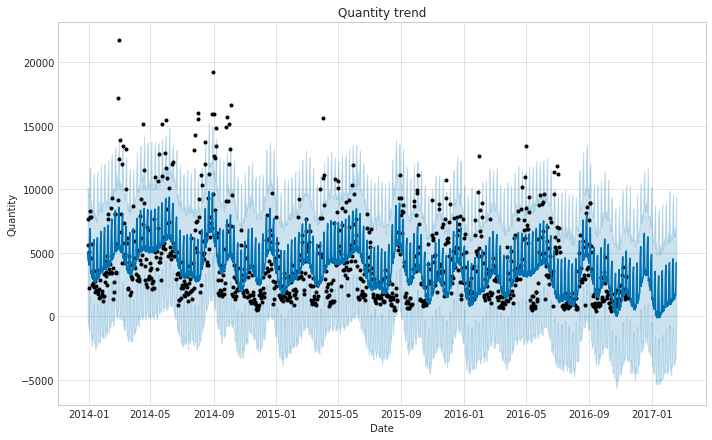

In [74]:
pm_prophet.plot(pm_forecast, xlabel = 'Date', ylabel = 'Quantity')
plt.title('Quantity trend');

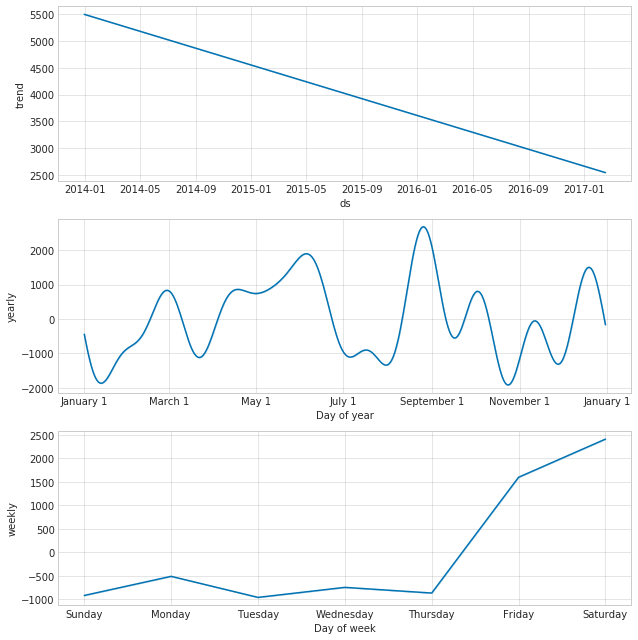

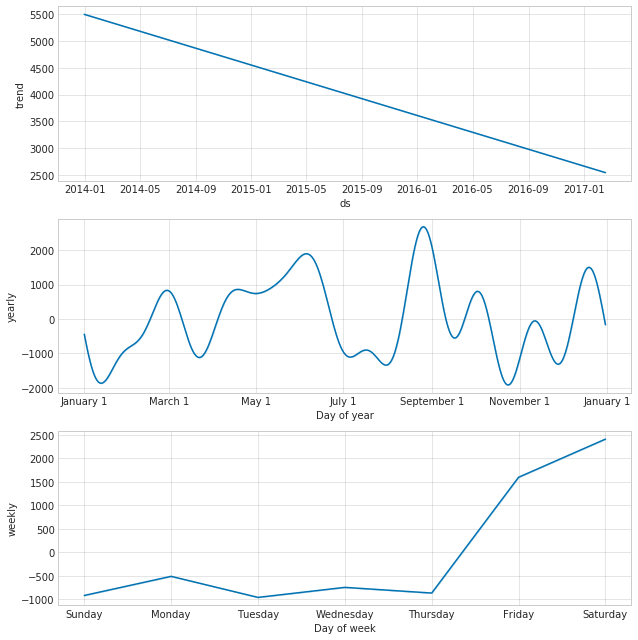

In [76]:
pm_prophet.plot_components(pm_forecast)